## Long strategy based on Turnover

### Module, Data import
|**Variable**|**변수 설명**|
|:---:|:---:|
|**df_cap**| KOSPI 상장종목 월별 시가총액 데이터|
|**df_TO**| KOSPI 상장종목 월별 주식 회전율|
|**df_p**| KOSPI 상장종목 월별 종가|
|**df_q**| KOSPI 상장종목 월별 거래량|
|**df_adj_close**| KOSPI 상장종목 일별 조정 종가|

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, seaborn as sns
%matplotlib inline

df_cap = pd.read_csv('df_cap.csv', index_col = 0)
df_TO = pd.read_csv('df_TO.csv', index_col = 0)
df_p = pd.read_csv('df_p.csv', index_col = 0)
df_q = pd.read_csv('df_q.csv', index_col = 0)
df_adj_close = pd.read_csv('adj_close.csv', index_col = 0)

C:\Users\chris\AppData\Local\Temp\ipykernel_2444\1339463029.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adj_close = pd.read_csv('adj_close.csv', index_col = 0)


In [2]:
df_adj_close

,20011130,20011203,20011204,20011205,20011206,20011207,20011210,20011211,20011212,20011213,...,20221117,20221118,20221121,20221122,20221123,20221124,20221125,20221128,20221129,20221130
5930,4360.0,4490.0,4600.0,5290.0,5500.0,5670.0,5200.0,5170.0,5400.0,5300.0,...,61400.0,61800.0,61400.0,60600.0,61000.0,61400.0,61000.0,60100.0,60600.0,62200.0
17670,45550.0,44514.0,44859.0,49000.0,46412.0,46930.0,43565.0,44169.0,44946.0,43824.0,...,49850.0,49550.0,49750.0,49750.0,50000.0,50000.0,50000.0,49900.0,49800.0,50000.0
30200,53100.0,51900.0,51000.0,53000.0,51500.0,53300.0,50500.0,51400.0,51600.0,50900.0,...,36300.0,36600.0,36550.0,36850.0,37150.0,36650.0,37100.0,37150.0,37150.0,37400.0
15760,23000.0,22750.0,22500.0,23550.0,22750.0,23100.0,22200.0,22350.0,22700.0,22350.0,...,19550.0,19700.0,19500.0,19350.0,19900.0,19850.0,20150.0,20000.0,20250.0,20700.0
60000,46267.0,46550.0,46031.0,46928.0,45323.0,44945.0,43056.0,43765.0,44378.0,45039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4600.0
440200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1980.0,1975.0,1980.0,1975.0,1975.0,1975.0,1975.0,1980.0,1975.0,1975.0
438220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2000.0,2000.0
440790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,2000.0,2000.0,1995.0,2000.0,1995.0,2000.0,1995.0,1990.0,1985.0


In [3]:
df_cap

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
티커,,,,,,,,,,,,,,,,,,,,,
005930,3.298958e+13,4.222061e+13,4.547419e+13,5.192672e+13,5.589079e+13,5.803774e+13,5.202116e+13,5.006687e+13,5.077855e+13,5.054948e+13,...,4.304213e+14,4.154969e+14,4.023633e+14,4.023633e+14,3.402776e+14,3.665446e+14,3.563960e+14,3.169955e+14,3.546051e+14,3.713205e+14
017670,2.353630e+13,2.389292e+13,2.282308e+13,2.317969e+13,2.585427e+13,2.242190e+13,2.411580e+13,2.402664e+13,2.059427e+13,2.108461e+13,...,1.194829e+13,1.245161e+13,1.247349e+13,1.249537e+13,1.137932e+13,1.172946e+13,1.140121e+13,1.111672e+13,1.096354e+13,1.094166e+13
030200,1.657780e+13,1.559437e+13,1.465777e+13,1.820124e+13,1.945004e+13,1.817002e+13,1.692122e+13,1.507924e+13,1.368996e+13,1.707732e+13,...,8.355578e+12,9.321692e+12,9.347803e+12,9.896138e+12,9.517525e+12,9.856971e+12,9.713359e+12,9.452247e+12,9.556692e+12,9.765582e+12
015760,1.472232e+13,1.389019e+13,1.395420e+13,1.405021e+13,1.584250e+13,1.568247e+13,1.613054e+13,1.408222e+13,1.369816e+13,1.347412e+13,...,1.489357e+13,1.454049e+13,1.482937e+13,1.498986e+13,1.447629e+13,1.434790e+13,1.344915e+13,1.290348e+13,1.075290e+13,1.328866e+13
060000,1.468518e+13,1.492493e+13,1.729254e+13,1.735248e+13,1.663321e+13,1.871120e+13,1.991837e+13,1.855236e+13,1.747226e+13,1.785347e+13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.865875e+10
440200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.209688e+10
438220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.128000e+10


### 종목 선별
- 시가총액을 고려하여 월별 상위 500개의 종목들로 filtering한다

In [4]:
ticker = pd.DataFrame()
for i in df_cap.columns :
    temp = pd.DataFrame(df_cap[i].sort_values(ascending = False)[:500].index)
    ticker = pd.concat([ticker, temp], axis = 1)
ticker = pd.DataFrame(ticker.values, columns = df_cap.columns)

In [5]:
ticker

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,005930,005930,005930,005930,005930,005930,005930,005930,005930,005930,...,005930,005930,005930,005930,005930,005930,005930,005930,005930,005930
1,017670,017670,017670,017670,017670,017670,017670,017670,017670,017670,...,373220,373220,373220,373220,373220,373220,373220,373220,373220,373220
2,030200,030200,060000,030200,030200,060000,060000,060000,060000,060000,...,000660,000660,000660,000660,000660,000660,000660,000660,207940,207940
3,015760,060000,030200,060000,060000,030200,030200,030200,015760,030200,...,005935,035420,207940,207940,207940,207940,207940,207940,000660,000660
4,060000,015760,015760,015760,015760,015760,015760,015760,030200,015760,...,035420,207940,005935,005935,005935,005935,005935,005935,006400,051910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,015890,031950,008350,005900,035270,032500,039530,032180,058470,002930,...,138250,036810,294570,161000,001725,034830,006390,389260,094800,003220
496,003800,016580,013890,051780,015750,001750,028300,036690,000970,003670,...,006405,130660,123890,002900,004890,286940,243070,038500,138490,005180
497,036840,033920,000380,049430,033880,019490,019930,056060,001380,043090,...,226320,003030,035600,243070,099190,029960,007660,097230,267980,003800
498,017890,006405,003670,040670,048510,034980,037730,047610,000380,010820,...,088800,048550,117580,051500,027410,002900,298540,033310,001530,138490


### 거래 종가 차분
- 수익률을 계산하기 위해 월별 종목들의 종가에 대한 로그 차분값을 구한다

In [6]:
log_price = np.log(df_p / df_p.shift(1, axis = 1))

In [7]:
log_price

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,0.246717,0.074236,0.132283,0.070352,0.037338,-0.110610,-0.038753,0.010582,-0.004521,...,-0.016507,-0.035289,-0.032120,0.000000,-0.167594,0.074359,-0.028078,-0.117155,0.112117,0.046061
017670,NaN,0.015035,-0.045822,0.015501,0.109219,-0.142445,0.072825,-0.003692,-0.154158,0.023532,...,-0.032435,0.041261,0.001756,0.001753,-0.093560,0.030305,-0.028384,-0.025269,-0.013875,-0.001998
030200,NaN,-0.061154,-0.061939,0.216519,0.066359,-0.068076,-0.071204,-0.115249,-0.096657,0.221089,...,0.023717,0.109415,0.002797,0.057003,-0.039010,0.035044,-0.014677,-0.027250,0.010989,0.021622
015760,NaN,-0.058182,0.004598,0.006857,0.120058,-0.010152,0.028171,-0.135802,-0.027652,-0.016490,...,0.118861,-0.023992,0.019673,0.010764,-0.034862,-0.008909,-0.064688,-0.041419,-0.182322,0.211735
060000,NaN,0.073586,0.147242,0.003460,-0.042334,0.059458,0.062520,-0.071046,-0.059983,0.021584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtering, Sharpe ratio
- 3에서 구한 cap을 통해 월별 return값을 filterig한다
- 구한 return값을 이용해 6개월 단위의 sharpe ratio를 구한다

In [8]:
ret = pd.DataFrame()
for i in log_price.columns :
    temp = pd.DataFrame(log_price[i][ticker[i]])
    ret = pd.concat([ret, temp], axis = 1)
ret = pd.DataFrame(ret.values, columns = df_p.columns, index = ret.index)
ret

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,0.246717,0.074236,0.132283,0.070352,0.037338,-0.110610,-0.038753,0.010582,-0.004521,...,-0.016507,-0.035289,-0.032120,0.000000,-0.167594,0.074359,-0.028078,-0.117155,0.112117,0.046061
017670,NaN,0.015035,-0.045822,0.015501,0.109219,-0.142445,0.072825,-0.003692,-0.154158,0.023532,...,-0.032435,0.041261,0.001756,0.001753,-0.093560,0.030305,-0.028384,-0.025269,-0.013875,-0.001998
030200,NaN,-0.061154,-0.061939,0.216519,0.066359,-0.068076,-0.071204,-0.115249,-0.096657,0.221089,...,0.023717,0.109415,0.002797,0.057003,-0.039010,0.035044,-0.014677,-0.027250,0.010989,0.021622
015760,NaN,-0.058182,0.004598,0.006857,0.120058,-0.010152,0.028171,-0.135802,-0.027652,-0.016490,...,0.118861,-0.023992,0.019673,0.010764,-0.034862,-0.008909,-0.064688,-0.041419,-0.182322,0.211735
060000,NaN,0.073586,0.147242,0.003460,-0.042334,0.059458,0.062520,-0.071046,-0.059983,0.021584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051915,0.034908,NaN
432320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034056
118990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158406,0.133929
101670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.512136


In [9]:
temp1 = ret**2
temp2 = ret.copy()
variance6 = sum([temp1.shift(i, axis = 1) for i in range(6)]) / 6 - ((sum([temp2.shift(i, axis = 1) for i in range(6)])/6) ** 2)
variance6

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,NaN,NaN,NaN,NaN,NaN,0.011443,0.006427,0.005997,0.003333,...,0.002996,0.003002,0.002654,0.002524,0.003032,0.005156,0.005124,0.006160,0.009673,0.010291
017670,NaN,NaN,NaN,NaN,NaN,NaN,0.006665,0.006645,0.009964,0.010060,...,0.002385,0.001594,0.001136,0.001125,0.001713,0.002000,0.001970,0.001497,0.001423,0.001396
030200,NaN,NaN,NaN,NaN,NaN,NaN,0.011416,0.012987,0.013806,0.014156,...,0.000919,0.002696,0.001474,0.001330,0.002109,0.002098,0.002403,0.001155,0.001166,0.000711
015760,NaN,NaN,NaN,NaN,NaN,NaN,0.002896,0.005632,0.005751,0.005750,...,0.005366,0.005392,0.005203,0.003633,0.003549,0.002566,0.000804,0.000887,0.003889,0.013808
060000,NaN,NaN,NaN,NaN,NaN,NaN,0.003491,0.005291,0.002918,0.003033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
temp1 = ret**2
temp2 = ret.copy()
variance12 = sum([temp1.shift(i, axis = 1) for i in range(12)]) / 12 - ((sum([temp2.shift(i, axis = 1) for i in range(12)])/12) ** 2)
variance12

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001562,0.001606,0.001612,0.001631,0.003350,0.004168,0.004172,0.004881,0.006222,0.006412
017670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003045,0.002452,0.001821,0.001700,0.002410,0.002193,0.002257,0.001665,0.001541,0.001484
030200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004503,0.004845,0.004847,0.002490,0.002120,0.001957,0.001874,0.001967,0.001453,0.001411
015760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003627,0.003643,0.003637,0.002950,0.002938,0.002929,0.003117,0.003184,0.005364,0.009116
060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
log_price = np.log(df_p / df_p.shift(6, axis = 1))
ret = pd.DataFrame()
for i in log_price.columns :
    temp = pd.DataFrame(log_price[i][ticker[i]])
    ret = pd.concat([ret, temp], axis = 1)
ret = pd.DataFrame(ret.values, columns = df_p.columns, index = ret.index)
sharpe = ret/variance6
sharpe

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,NaN,NaN,NaN,NaN,NaN,39.352033,25.649927,16.872867,-10.683105,...,-20.644559,-20.866979,-13.184841,-22.282224,-104.722208,-34.358245,-36.828316,-43.927443,-13.061746,-7.801711
017670,NaN,NaN,NaN,NaN,NaN,NaN,3.647760,0.840549,-10.312567,-9.415575,...,25.190076,11.098766,57.436447,41.425446,-62.739232,-25.458920,-23.790999,-75.775659,-90.686298,-95.136205
030200,NaN,NaN,NaN,NaN,NaN,NaN,1.796108,-2.586597,-4.947757,-4.502560,...,-26.868669,33.696670,108.678764,168.227945,82.949458,90.057246,62.671966,12.037179,18.952607,-18.675506
015760,NaN,NaN,NaN,NaN,NaN,NaN,31.548554,2.438072,-3.220032,-7.281748,...,-6.317630,-7.226413,4.205819,32.495504,5.679666,31.780948,-126.901656,-134.707581,-82.660167,-8.724038
060000,NaN,NaN,NaN,NaN,NaN,NaN,87.055211,30.107428,-16.420910,-9.824658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Portfolio 작성
- sharpe ratio가 높은 상위 10%의 종목을 가려낸다
- 그렇게 나온 종목들 중, 주식의 회전율이 **6분위**인 종목을 추려 투자 전략을 완성한다
- Short-term momentum(Mamdouth Medhat, Maik Schmeling, 2018)에 따르면, 노이즈한 시장에서의 short tum moment based Turn over strategy에서는 Turnover가 높을수록 수익률이 떨어진다는 것을 주장
    - 아이디어를 얻어, 회전율이 높은 상위 5분위 종목들을 날린 뒤 남은 것들 중 가장 상위 5개인 종목들만 추림

In [12]:
rank_ticker = pd.DataFrame()
for i in range(len(ret.columns)) :
    temp = pd.DataFrame(sharpe.iloc[:,i].sort_values(ascending = False)[:50].index)
    rank_ticker = pd.concat([rank_ticker, temp], axis = 1)
rank_ticker.columns = df_TO.columns # 1%의 주식들

In [13]:
turnover = pd.DataFrame()
for i in df_TO.columns :
    temp = pd.DataFrame(df_TO[i][rank_ticker[i]])
    turnover = pd.concat([turnover, temp], axis = 1)
turnover = pd.DataFrame(turnover.values, columns = rank_ticker.columns, index = turnover.index)

In [14]:
rerank_ticker = pd.DataFrame()
for i in range(len(turnover.columns)) :
    temp = pd.DataFrame(turnover.iloc[:,i].sort_values(ascending = False)[26:31].index)
    rerank_ticker = pd.concat([rerank_ticker, temp], axis = 1)
rerank_ticker.columns = turnover.columns
#rerank_ticker = rerank_ticker.iloc[:,:-1] # 1%의 주식들

In [15]:
rerank_ticker

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,000810,051910,051910,032640,007360,000720,001230,004980,004170,017940,...,000660,000660,016710,035250,010050,010140,001450,047050,001450,016710
1,004170,009540,055550,000270,016830,005380,060000,000810,004980,018670,...,000060,001450,316140,086280,023530,298040,091990,081660,006260,051910
2,005935,006400,000140,016830,009540,034020,043650,002300,000210,000810,...,086390,042700,128940,023530,010950,005300,064960,005850,282330,033780
3,032390,004170,060000,055550,015760,060000,000140,043650,049770,036460,...,000150,030200,088980,105560,078930,001450,271560,010120,383220,282330
4,042660,005930,042660,060000,055550,000810,012750,042660,017940,001530,...,215200,005300,010130,282330,030200,023530,007310,010130,010120,192080


### Label Check

In [16]:
rerank_ticker

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,000810,051910,051910,032640,007360,000720,001230,004980,004170,017940,...,000660,000660,016710,035250,010050,010140,001450,047050,001450,016710
1,004170,009540,055550,000270,016830,005380,060000,000810,004980,018670,...,000060,001450,316140,086280,023530,298040,091990,081660,006260,051910
2,005935,006400,000140,016830,009540,034020,043650,002300,000210,000810,...,086390,042700,128940,023530,010950,005300,064960,005850,282330,033780
3,032390,004170,060000,055550,015760,060000,000140,043650,049770,036460,...,000150,030200,088980,105560,078930,001450,271560,010120,383220,282330
4,042660,005930,042660,060000,055550,000810,012750,042660,017940,001530,...,215200,005300,010130,282330,030200,023530,007310,010130,010120,192080


In [17]:
temp = []
for i in range(1, len(rerank_ticker.columns)) :
    temp.append(len(np.array(list(set(rerank_ticker.iloc[:,i-1].values) & set(rerank_ticker.iloc[:,i].values)))))
label_count = pd.DataFrame(np.array(temp), index = rerank_ticker.columns[1:], columns = ['duplicated_label']).T

In [18]:
label_count

,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,20020930,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
duplicated_label,1,1,2,2,0,1,1,1,1,0,...,2,1,0,0,1,1,1,0,1,1


In [19]:
label_count.values.sum()

211

In [20]:
label = pd.DataFrame()
for i in range(1, len(rerank_ticker.columns)) :
    temp = pd.DataFrame(np.array(list(set(rerank_ticker.iloc[:,i-1].values) & set(rerank_ticker.iloc[:,i].values))))
    label = pd.concat([label, temp], axis = 1)
label.columns = rerank_ticker.columns[1:]
label

,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,20020930,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,004170,051910,055550,055550,NaN,060000,043650,004980,017940,NaN,...,215200,000660,NaN,NaN,023530,023530,001450,NaN,010120,282330
1,NaN,NaN,060000,016830,NaN,NaN,NaN,NaN,NaN,NaN,...,000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Backtest
- 전략을 사용해 실제로 투자하였을 때, 얼마만큼의 성과가 나올지 확인하는 단계이다
- 일별 조정 종가를 활용해 Bench Mark와 비교하여 성능을 측정한다

In [21]:
back_test = np.log(df_adj_close / df_adj_close.shift(1, axis = 1)).shift(-1, axis=1)
back_test.index = df_q.index

In [22]:
back_test

,20011130,20011203,20011204,20011205,20011206,20011207,20011210,20011211,20011212,20011213,...,20221117,20221118,20221121,20221122,20221123,20221124,20221125,20221128,20221129,20221130
티커,,,,,,,,,,,,,,,,,,,,,
005930,0.029381,0.024204,0.139762,0.038930,0.030441,-0.086530,-0.005786,0.043526,-0.018692,-0.038466,...,0.006494,-0.006494,-0.013115,0.006579,0.006536,-0.006536,-0.014864,0.008285,0.026060,NaN
017670,-0.023007,0.007720,0.088296,-0.054262,0.011099,-0.074403,0.013769,0.017439,-0.025280,-0.021893,...,-0.006036,0.004028,0.000000,0.005013,0.000000,0.000000,-0.002002,-0.002006,0.004008,NaN
030200,-0.022858,-0.017493,0.038466,-0.028710,0.034355,-0.053963,0.017665,0.003884,-0.013659,-0.018840,...,0.008230,-0.001367,0.008174,0.008108,-0.013550,0.012204,0.001347,0.000000,0.006707,NaN
015760,-0.010929,-0.011050,0.045611,-0.034561,0.015267,-0.039740,0.006734,0.015539,-0.015539,-0.020340,...,0.007643,-0.010204,-0.007722,0.028027,-0.002516,0.015000,-0.007472,0.012423,0.021979,NaN
060000,0.006098,-0.011212,0.019299,-0.034800,-0.008375,-0.042938,0.016333,0.013909,0.014785,-0.007354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002528,0.002528,-0.002528,0.000000,0.000000,0.000000,0.002528,-0.002528,0.000000,NaN
438220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


In [23]:
j = 0
final_rank_ticker = pd.DataFrame()
for i in range(1, len(back_test.columns)) :
    if df_adj_close.columns[i-1][5] != df_adj_close.columns[i][5] :
        j += 1
    final_rank_ticker = pd.concat([final_rank_ticker, 
                                   pd.DataFrame(back_test.loc[rerank_ticker.iloc[:,j-1].values].iloc[:,i:i+1].values)]
                                  ,axis = 1)
    if i % 500 == 0 or i == (len(back_test.columns)-1):
        print('roading... %d/%d completed' % (i, len(back_test.columns)-1))
print('Done!')

roading... 500/5189 completed
roading... 1000/5189 completed
roading... 1500/5189 completed
roading... 2000/5189 completed
roading... 2500/5189 completed
roading... 3000/5189 completed
roading... 3500/5189 completed
roading... 4000/5189 completed
roading... 4500/5189 completed
roading... 5000/5189 completed
roading... 5189/5189 completed
Done!


In [24]:
final_rank_ticker

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.013685,0.070304,0.014572,0.021468,-0.025091,0.009033,0.024868,-0.017700,-0.045670,0.003731,...,0.010417,0.000000,0.013722,-0.001705,0.003407,0.013514,-0.011814,0.010135,0.015013,NaN
1,-0.054313,0.013847,0.040466,0.026083,-0.021690,-0.022171,0.035247,0.071010,0.027827,0.003923,...,-0.008798,0.000000,0.048860,0.030389,-0.013699,0.029894,0.000000,-0.006716,0.013387,NaN
2,0.015748,0.136132,0.018019,0.068993,-0.077962,-0.004515,0.009009,0.022174,-0.040274,-0.018434,...,-0.015267,-0.005141,0.012804,0.017655,0.002497,0.024632,-0.027129,-0.005013,0.032141,NaN
3,-0.010501,0.028936,0.003428,-0.003428,-0.030114,-0.016603,0.032934,-0.009303,-0.021260,-0.047658,...,0.019048,-0.051624,-0.016695,-0.003373,0.000000,-0.013606,-0.020762,0.044452,0.013289,NaN
4,-0.041449,-0.033469,-0.037990,0.031486,-0.063995,-0.059104,0.014652,0.044452,0.022357,-0.029338,...,0.018116,0.005372,0.050489,0.000000,0.011814,0.006689,-0.003339,-0.027120,-0.008628,NaN


In [25]:
final_rank_ticker.columns = back_test.columns[1:]

In [26]:
final_rank_ticker

,20011203,20011204,20011205,20011206,20011207,20011210,20011211,20011212,20011213,20011214,...,20221117,20221118,20221121,20221122,20221123,20221124,20221125,20221128,20221129,20221130
0,-0.013685,0.070304,0.014572,0.021468,-0.025091,0.009033,0.024868,-0.017700,-0.045670,0.003731,...,0.010417,0.000000,0.013722,-0.001705,0.003407,0.013514,-0.011814,0.010135,0.015013,NaN
1,-0.054313,0.013847,0.040466,0.026083,-0.021690,-0.022171,0.035247,0.071010,0.027827,0.003923,...,-0.008798,0.000000,0.048860,0.030389,-0.013699,0.029894,0.000000,-0.006716,0.013387,NaN
2,0.015748,0.136132,0.018019,0.068993,-0.077962,-0.004515,0.009009,0.022174,-0.040274,-0.018434,...,-0.015267,-0.005141,0.012804,0.017655,0.002497,0.024632,-0.027129,-0.005013,0.032141,NaN
3,-0.010501,0.028936,0.003428,-0.003428,-0.030114,-0.016603,0.032934,-0.009303,-0.021260,-0.047658,...,0.019048,-0.051624,-0.016695,-0.003373,0.000000,-0.013606,-0.020762,0.044452,0.013289,NaN
4,-0.041449,-0.033469,-0.037990,0.031486,-0.063995,-0.059104,0.014652,0.044452,0.022357,-0.029338,...,0.018116,0.005372,0.050489,0.000000,0.011814,0.006689,-0.003339,-0.027120,-0.008628,NaN


In [27]:
final_rank_ticker.columns = pd.to_datetime(final_rank_ticker.columns)

Text(0.5, 1.0, 'Long position Strategy based on Turnover')

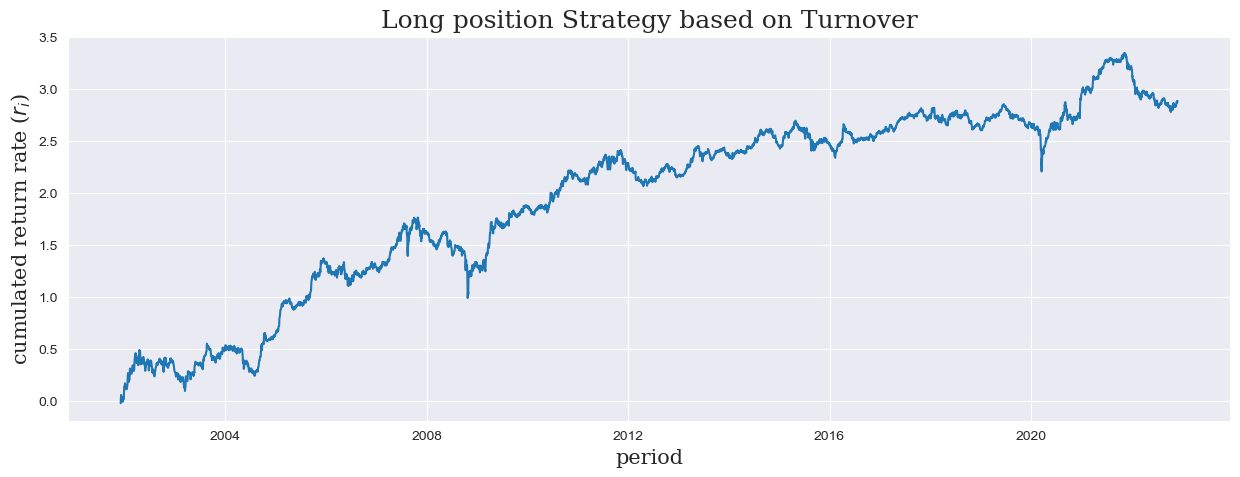

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
plt.plot(final_rank_ticker.mean().cumsum())
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long position Strategy based on Turnover', fontsize = 18, fontfamily = 'Serif')

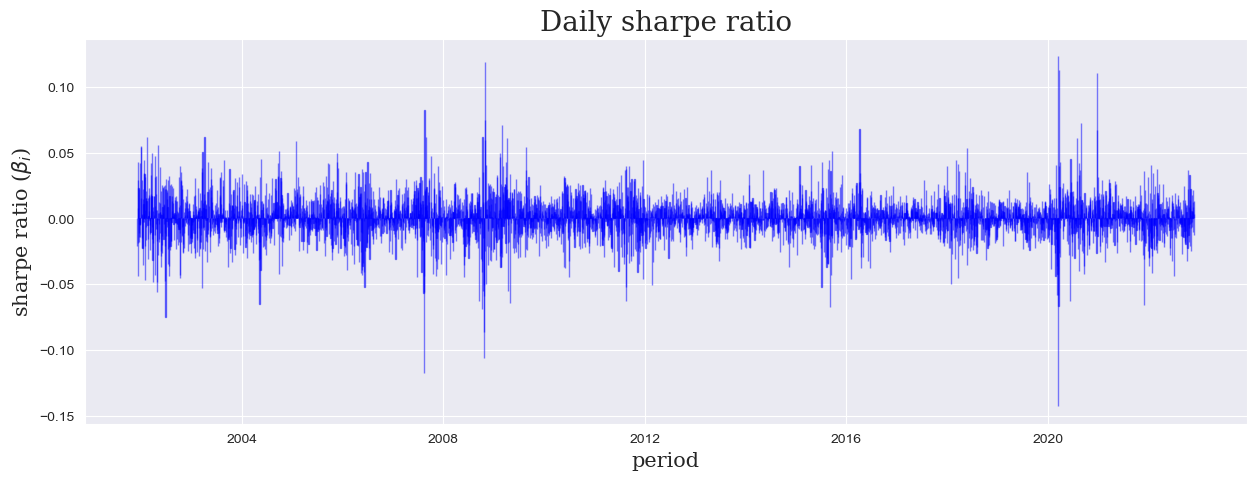

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
plt.bar(final_rank_ticker.columns, final_rank_ticker.mean(), color = 'blue', edgecolor = 'blue', alpha = 0.5)
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.title('Daily sharpe ratio', fontsize = 20, fontfamily = 'Serif')
plt.ylabel(r'sharpe ratio ($\beta_i$)', fontsize = 15, fontfamily = 'Serif')
plt.show()

### Bench mark
- Benchmark로는 KOSPI INDEX를 사용한다

In [30]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2001, 11, 1)
end = datetime.datetime(2022, 11, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
kospi = df_null['Close'].dropna().astype('float')

In [31]:
final_rank_ticker

,2001-12-03,2001-12-04,2001-12-05,2001-12-06,2001-12-07,2001-12-10,2001-12-11,2001-12-12,2001-12-13,2001-12-14,...,2022-11-17,2022-11-18,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-28,2022-11-29,2022-11-30
0,-0.013685,0.070304,0.014572,0.021468,-0.025091,0.009033,0.024868,-0.017700,-0.045670,0.003731,...,0.010417,0.000000,0.013722,-0.001705,0.003407,0.013514,-0.011814,0.010135,0.015013,NaN
1,-0.054313,0.013847,0.040466,0.026083,-0.021690,-0.022171,0.035247,0.071010,0.027827,0.003923,...,-0.008798,0.000000,0.048860,0.030389,-0.013699,0.029894,0.000000,-0.006716,0.013387,NaN
2,0.015748,0.136132,0.018019,0.068993,-0.077962,-0.004515,0.009009,0.022174,-0.040274,-0.018434,...,-0.015267,-0.005141,0.012804,0.017655,0.002497,0.024632,-0.027129,-0.005013,0.032141,NaN
3,-0.010501,0.028936,0.003428,-0.003428,-0.030114,-0.016603,0.032934,-0.009303,-0.021260,-0.047658,...,0.019048,-0.051624,-0.016695,-0.003373,0.000000,-0.013606,-0.020762,0.044452,0.013289,NaN
4,-0.041449,-0.033469,-0.037990,0.031486,-0.063995,-0.059104,0.014652,0.044452,0.022357,-0.029338,...,0.018116,0.005372,0.050489,0.000000,0.011814,0.006689,-0.003339,-0.027120,-0.008628,NaN


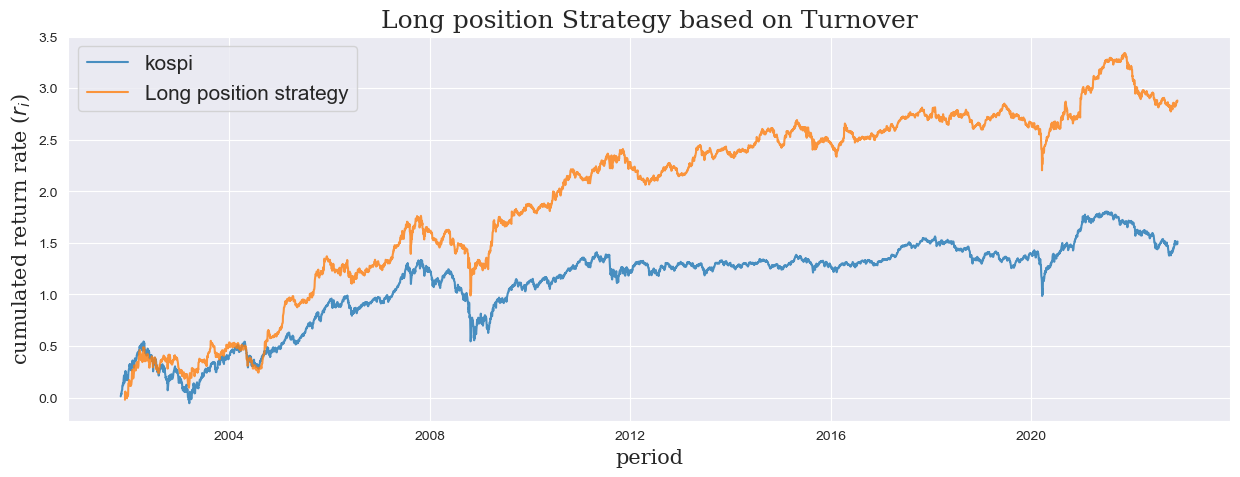

In [32]:
plt.figure(figsize = (15,5))
plt.plot(np.log(kospi / kospi.shift(1)).cumsum(), label = 'kospi', alpha = 0.8)
plt.plot(final_rank_ticker.mean().cumsum(), label = 'Long position strategy', alpha = 0.8)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long position Strategy based on Turnover', fontsize = 18, fontfamily = 'Serif')
plt.show()

### 성과 측정

In [33]:
print('Montly Sharpe ratio : ', final_rank_ticker.mean().mean() * 20) # 월별 sharpe ratio

Montly Sharpe ratio :  0.011107727147647987


In [34]:
print('Annual Sharpe ratio : ', (final_rank_ticker.mean().mean()/final_rank_ticker.mean().std()) * (252 ** 0.5)) # annual sharpe ratio

Annual Sharpe ratio :  0.5682979263411272


In [35]:
print('Annual Sharpe ratio of Benchmark :', (np.log(kospi / kospi.shift(1)).mean() / np.log(kospi / kospi.shift(1)).std()) * (252**0.5))

Annual Sharpe ratio of Benchmark : 0.34736915759787046


## Short strategy based on Turnover

### 종목 선별
- 공매도는 kospi200내의 종목들만 거래가 가능하므로 KOSPI 상위 200개의 종목들에 대해서 선별한다

In [36]:
ticker_short = pd.DataFrame()
for i in df_cap.columns :
    temp = pd.DataFrame(df_cap[i].sort_values(ascending = False)[:200].index)
    ticker_short = pd.concat([ticker_short, temp], axis = 1)
ticker_short = pd.DataFrame(ticker_short.values, columns = df_cap.columns)
ticker_short

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,005930,005930,005930,005930,005930,005930,005930,005930,005930,005930,...,005930,005930,005930,005930,005930,005930,005930,005930,005930,005930
1,017670,017670,017670,017670,017670,017670,017670,017670,017670,017670,...,373220,373220,373220,373220,373220,373220,373220,373220,373220,373220
2,030200,030200,060000,030200,030200,060000,060000,060000,060000,060000,...,000660,000660,000660,000660,000660,000660,000660,000660,207940,207940
3,015760,060000,030200,060000,060000,030200,030200,030200,015760,030200,...,005935,035420,207940,207940,207940,207940,207940,207940,000660,000660
4,060000,015760,015760,015760,015760,015760,015760,015760,030200,015760,...,035420,207940,005935,005935,005935,005935,005935,005935,006400,051910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,026870,045280,002860,026960,036930,012700,054630,032380,008000,008000,...,012510,079550,042700,056190,025900,042700,240810,330590,353200,240810
196,006120,045380,004980,012460,003530,002860,067910,001720,005945,015350,...,249420,139130,139130,067630,215600,025900,214370,000240,003090,336370
197,036620,040300,004690,004690,008560,004690,011930,005945,008930,001720,...,140410,381970,353200,034230,042700,016710,048410,139130,120110,000240
198,011760,023590,017810,030520,017810,010280,051915,020760,032380,026870,...,025900,017800,020560,001120,034230,139130,000150,000670,064760,139130


### 거래 종가 차분
- 수익률을 계산하기 위해 월별 종목들의 종가에 대한 로그 차분값을 구한다

In [37]:
log_price = np.log(df_p / df_p.shift(1, axis = 1))

### Filtering, Sharpe ratio
- 3에서 구한 cap을 통해 월별 return값을 filterig한다
- 구한 return값을 이용해 6개월 단위의 sharpe ratio를 구한다

In [38]:
ret = pd.DataFrame()
for i in log_price.columns :
    temp = pd.DataFrame(log_price[i][ticker_short[i]])
    ret = pd.concat([ret, temp], axis = 1)
ret = pd.DataFrame(ret.values, columns = df_p.columns, index = ret.index)
ret

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,0.246717,0.074236,0.132283,0.070352,0.037338,-0.110610,-0.038753,0.010582,-0.004521,...,-0.016507,-0.035289,-0.032120,0.000000,-0.167594,0.074359,-0.028078,-0.117155,0.112117,0.046061
017670,NaN,0.015035,-0.045822,0.015501,0.109219,-0.142445,0.072825,-0.003692,-0.154158,0.023532,...,-0.032435,0.041261,0.001756,0.001753,-0.093560,0.030305,-0.028384,-0.025269,-0.013875,-0.001998
030200,NaN,-0.061154,-0.061939,0.216519,0.066359,-0.068076,-0.071204,-0.115249,-0.096657,0.221089,...,0.023717,0.109415,0.002797,0.057003,-0.039010,0.035044,-0.014677,-0.027250,0.010989,0.021622
015760,NaN,-0.058182,0.004598,0.006857,0.120058,-0.010152,0.028171,-0.135802,-0.027652,-0.016490,...,0.118861,-0.023992,0.019673,0.010764,-0.034862,-0.008909,-0.064688,-0.041419,-0.182322,0.211735
060000,NaN,0.073586,0.147242,0.003460,-0.042334,0.059458,0.062520,-0.071046,-0.059983,0.021584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.048927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.074611,0.089052,-0.246203,0.084299,0.041314,NaN,0.146390,NaN
365340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333362,-0.001559,0.044994,-0.083155
393890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178517,0.063158


In [39]:
temp1 = ret**2
temp2 = ret.copy()
variance6 = sum([temp1.shift(i, axis = 1) for i in range(6)]) / 6 - ((sum([temp2.shift(i, axis = 1) for i in range(6)])/6) ** 2)
variance6

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,NaN,NaN,NaN,NaN,NaN,0.011443,0.006427,0.005997,0.003333,...,0.002996,0.003002,0.002654,0.002524,0.003032,0.005156,0.005124,0.006160,0.009673,0.010291
017670,NaN,NaN,NaN,NaN,NaN,NaN,0.006665,0.006645,0.009964,0.010060,...,0.002385,0.001594,0.001136,0.001125,0.001713,0.002000,0.001970,0.001497,0.001423,0.001396
030200,NaN,NaN,NaN,NaN,NaN,NaN,0.011416,0.012987,0.013806,0.014156,...,0.000919,0.002696,0.001474,0.001330,0.002109,0.002098,0.002403,0.001155,0.001166,0.000711
015760,NaN,NaN,NaN,NaN,NaN,NaN,0.002896,0.005632,0.005751,0.005750,...,0.005366,0.005392,0.005203,0.003633,0.003549,0.002566,0.000804,0.000887,0.003889,0.013808
060000,NaN,NaN,NaN,NaN,NaN,NaN,0.003491,0.005291,0.002918,0.003033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
log_price = np.log(df_p / df_p.shift(6, axis = 1))
ret = pd.DataFrame()
for i in log_price.columns :
    temp = pd.DataFrame(log_price[i][ticker_short[i]])
    ret = pd.concat([ret, temp], axis = 1)
ret = pd.DataFrame(ret.values, columns = df_p.columns, index = ret.index)
sharpe = ret/variance6
sharpe

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
005930,NaN,NaN,NaN,NaN,NaN,NaN,39.352033,25.649927,16.872867,-10.683105,...,-20.644559,-20.866979,-13.184841,-22.282224,-104.722208,-34.358245,-36.828316,-43.927443,-13.061746,-7.801711
017670,NaN,NaN,NaN,NaN,NaN,NaN,3.647760,0.840549,-10.312567,-9.415575,...,25.190076,11.098766,57.436447,41.425446,-62.739232,-25.458920,-23.790999,-75.775659,-90.686298,-95.136205
030200,NaN,NaN,NaN,NaN,NaN,NaN,1.796108,-2.586597,-4.947757,-4.502560,...,-26.868669,33.696670,108.678764,168.227945,82.949458,90.057246,62.671966,12.037179,18.952607,-18.675506
015760,NaN,NaN,NaN,NaN,NaN,NaN,31.548554,2.438072,-3.220032,-7.281748,...,-6.317630,-7.226413,4.205819,32.495504,5.679666,31.780948,-126.901656,-134.707581,-82.660167,-8.724038
060000,NaN,NaN,NaN,NaN,NaN,NaN,87.055211,30.107428,-16.420910,-9.824658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
rank_ticker = pd.DataFrame()
for i in range(len(ret.columns)) :
    temp = pd.DataFrame(sharpe.iloc[:,i].sort_values(ascending = True)[:50].index)
    rank_ticker = pd.concat([rank_ticker, temp], axis = 1)
rank_ticker.columns = df_TO.columns

In [42]:
turnover = pd.DataFrame()
for i in df_TO.columns :
    temp = pd.DataFrame(df_TO[i][rank_ticker[i]])
    turnover = pd.concat([turnover, temp], axis = 1)
turnover = pd.DataFrame(turnover.values, columns = rank_ticker.columns, index = turnover.index)

In [43]:
rerank_ticker = pd.DataFrame()
for i in range(len(turnover.columns)) :
    temp = pd.DataFrame(turnover.iloc[:,i].sort_values(ascending = False)[:5].index)
    rerank_ticker = pd.concat([rerank_ticker, temp], axis = 1)
rerank_ticker.columns = turnover.columns

In [44]:
rerank_ticker

,20011130,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,000660,000660,000660,000660,000660,000660,000660,000660,035610,016880,...,036570,010060,145020,112040,112040,096530,052690,000990,006360,006360
1,008670,003450,003450,003450,008670,008670,002610,035610,001830,033240,...,012510,298020,112040,020150,048260,000990,006360,108320,035420,096530
2,033630,033630,003540,010140,010140,033630,035610,056850,047080,003540,...,302440,271940,011210,263750,009150,112040,298020,006360,035720,011070
3,006800,008670,008670,000830,033630,010140,008770,008770,009270,003545,...,240810,081660,336260,096530,096530,048260,323410,375500,008770,108320
4,003450,006800,033630,003540,003450,005935,027050,035000,053800,053800,...,011210,036570,298050,293490,011210,361610,375500,008770,323410,293490


### Label check

In [45]:
temp = []
for i in range(1, len(rerank_ticker.columns)) :
    temp.append(len(np.array(list(set(rerank_ticker.iloc[:,i-1].values) & set(rerank_ticker.iloc[:,i].values)))))
label_count = pd.DataFrame(np.array(temp), index = rerank_ticker.columns[1:], columns = ['duplicated_label']).T

In [46]:
label_count

,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,20020930,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
duplicated_label,5,4,3,3,4,1,3,1,1,1,...,1,1,0,1,2,3,0,2,2,1


In [47]:
label = pd.DataFrame()
for i in range(1, len(rerank_ticker.columns)) :
    temp = pd.DataFrame(np.array(list(set(rerank_ticker.iloc[:,i-1].values) & set(rerank_ticker.iloc[:,i].values))))
    label = pd.concat([label, temp], axis = 1)
label.columns = rerank_ticker.columns[1:]
label

,20011228,20020131,20020228,20020329,20020430,20020531,20020628,20020731,20020830,20020930,...,20220228,20220331,20220429,20220531,20220630,20220729,20220831,20220930,20221031,20221130
0,033630,008670,000660,000660,008670,000660,000660,035610,053800,016880,...,240810,036570,NaN,112040,096530,048260,NaN,375500,008770,006360
1,008670,000660,003540,003450,000660,NaN,008770,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,112040,096530,NaN,006360,006360,NaN
2,000660,003450,003450,010140,033630,NaN,035610,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,112040,NaN,NaN,NaN,NaN
3,003450,033630,NaN,NaN,010140,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,006800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
label_count.values.sum()

490

In [49]:
back_test = np.log(df_adj_close / df_adj_close.shift(1, axis = 1)).shift(-1, axis=1)
back_test.index = df_q.index

In [50]:
back_test

,20011130,20011203,20011204,20011205,20011206,20011207,20011210,20011211,20011212,20011213,...,20221117,20221118,20221121,20221122,20221123,20221124,20221125,20221128,20221129,20221130
티커,,,,,,,,,,,,,,,,,,,,,
005930,0.029381,0.024204,0.139762,0.038930,0.030441,-0.086530,-0.005786,0.043526,-0.018692,-0.038466,...,0.006494,-0.006494,-0.013115,0.006579,0.006536,-0.006536,-0.014864,0.008285,0.026060,NaN
017670,-0.023007,0.007720,0.088296,-0.054262,0.011099,-0.074403,0.013769,0.017439,-0.025280,-0.021893,...,-0.006036,0.004028,0.000000,0.005013,0.000000,0.000000,-0.002002,-0.002006,0.004008,NaN
030200,-0.022858,-0.017493,0.038466,-0.028710,0.034355,-0.053963,0.017665,0.003884,-0.013659,-0.018840,...,0.008230,-0.001367,0.008174,0.008108,-0.013550,0.012204,0.001347,0.000000,0.006707,NaN
015760,-0.010929,-0.011050,0.045611,-0.034561,0.015267,-0.039740,0.006734,0.015539,-0.015539,-0.020340,...,0.007643,-0.010204,-0.007722,0.028027,-0.002516,0.015000,-0.007472,0.012423,0.021979,NaN
060000,0.006098,-0.011212,0.019299,-0.034800,-0.008375,-0.042938,0.016333,0.013909,0.014785,-0.007354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002528,0.002528,-0.002528,0.000000,0.000000,0.000000,0.002528,-0.002528,0.000000,NaN
438220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


In [51]:
j = 0
final_rank_ticker_short = pd.DataFrame()
for i in range(1, len(back_test.columns)) :
    if df_adj_close.columns[i-1][5] != df_adj_close.columns[i][5] :
        j += 1
    final_rank_ticker_short = pd.concat([final_rank_ticker_short, 
                                   pd.DataFrame(back_test.loc[rerank_ticker.iloc[:,j-1].values].iloc[:,i:i+1].values)]
                                  ,axis = 1)
    if i % 500 == 0 or i == (len(back_test.columns)-1):
        print('roading... %d / %d completed' % (i,len(back_test.columns)-1))
print('Done!')

roading... 500 / 5189 completed
roading... 1000 / 5189 completed
roading... 1500 / 5189 completed
roading... 2000 / 5189 completed
roading... 2500 / 5189 completed
roading... 3000 / 5189 completed
roading... 3500 / 5189 completed
roading... 4000 / 5189 completed
roading... 4500 / 5189 completed
roading... 5000 / 5189 completed
roading... 5189 / 5189 completed
Done!


In [52]:
final_rank_ticker_short.columns = back_test.columns[1:]
final_rank_ticker_short.columns = pd.to_datetime(final_rank_ticker.columns)

Text(0.5, 1.0, 'Short position Strategy based on Turnover')

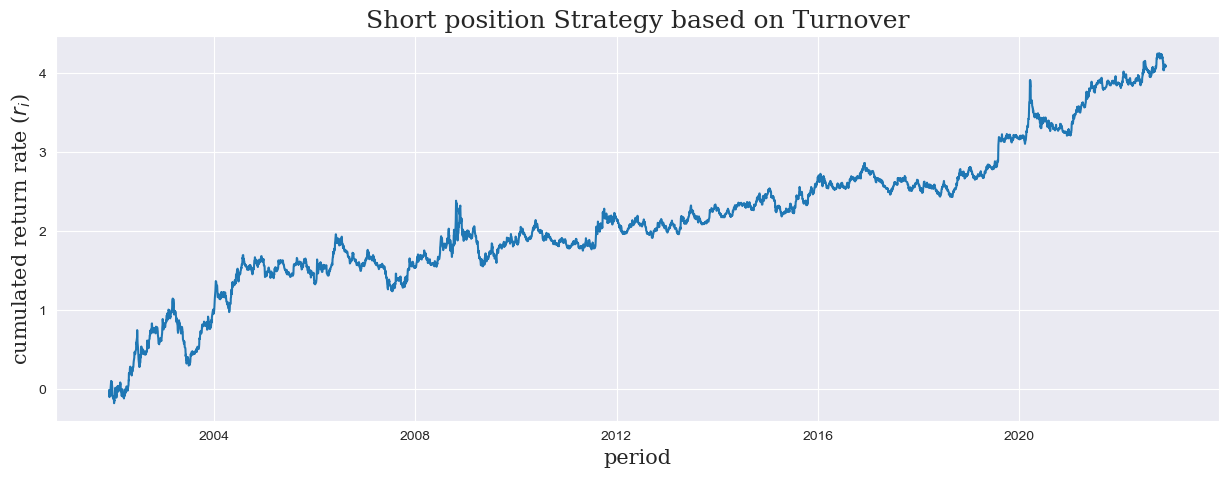

In [53]:
plt.figure(figsize = (15,5))
plt.plot(-final_rank_ticker_short.mean().cumsum())
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Short position Strategy based on Turnover', fontsize = 18, fontfamily = 'Serif')

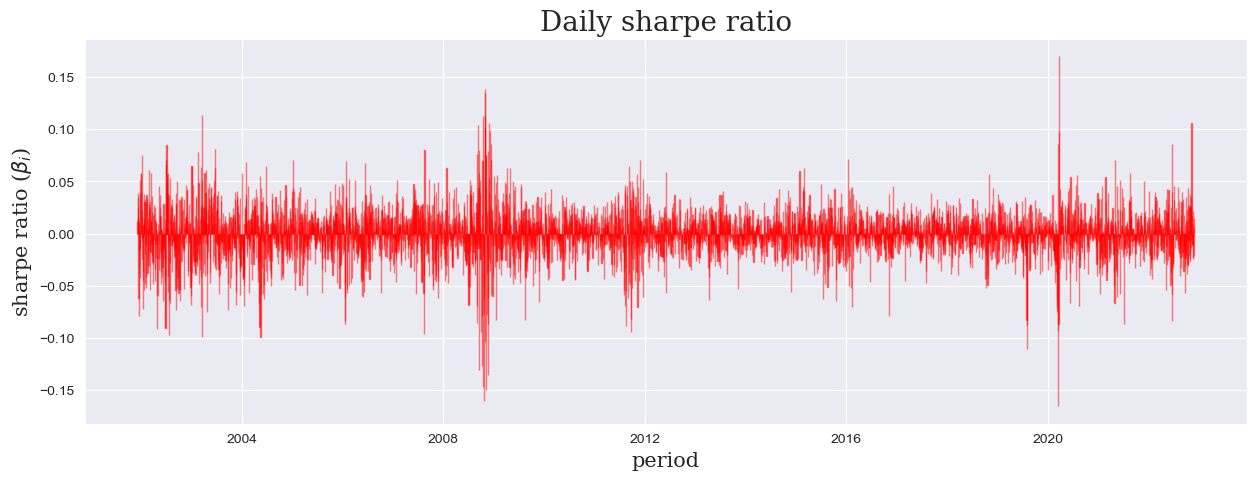

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
plt.bar(final_rank_ticker_short.columns, final_rank_ticker_short.mean(), color = 'red', edgecolor = 'red', alpha = 0.5)
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.title('Daily sharpe ratio', fontsize = 20, fontfamily = 'Serif')
plt.ylabel(r'sharpe ratio ($\beta_i$)', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [55]:
#매수/매도 turnover 계산
num = ((105*12-211)/5/21/2)+((105*12-490)/5/21/2)
print('Turnover :',num)

Turnover : 8.661904761904761


Text(0.5, 1.0, 'Long - Short Strategy based on Turnover')

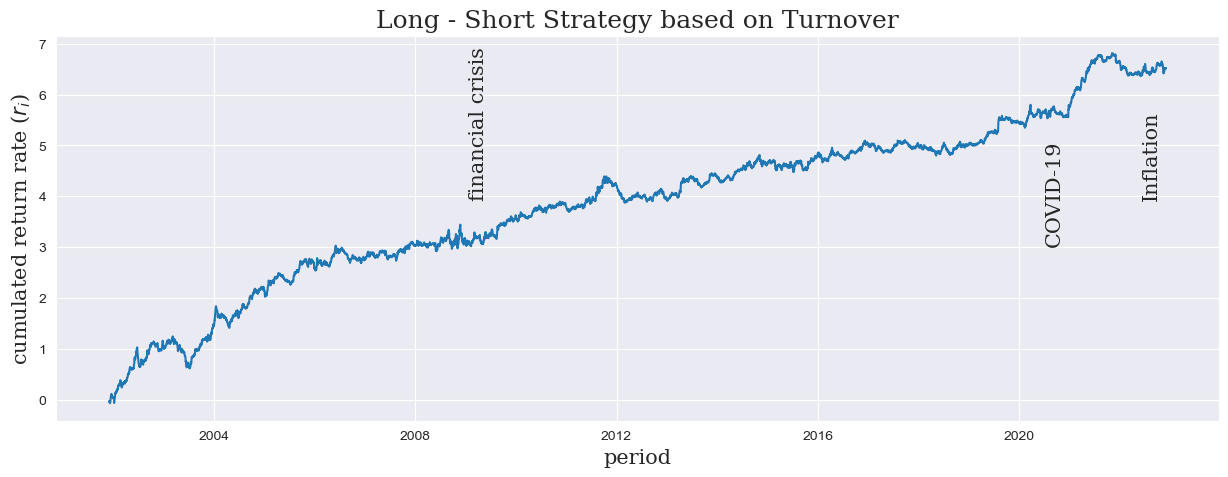

In [56]:
real_final_cumsum = (final_rank_ticker.mean() - final_rank_ticker_short.mean() - 0.0025/252*num).cumsum()
plt.figure(figsize = (15,5))
plt.plot(real_final_cumsum)
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
#plt.axvspan('2008-06-01', '2009-07-31', color = 'gray', alpha = 0.2)
#plt.axvspan('2020-02-01', '2020-12-31', color = 'gray', alpha = 0.2)
#plt.axvspan('2022-02-01', '2022-11-26', color = 'gray', alpha = 0.2)
plt.text(14270, 4.0, 'financial crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(18450, 3.1, 'COVID-19', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(19150, 4, 'Inflation', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.title('Long - Short Strategy based on Turnover', fontsize = 18, fontfamily = 'Serif')

In [57]:
import pandas_datareader as wb
import datetime

start = datetime.datetime(2001, 11, 1)
end = datetime.datetime(2022, 11, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
kospi = df_null['Close'].dropna().astype('float')

In [58]:
import FinanceDataReader as fdr
kospi200 = fdr.DataReader(symbol="069500", start="2001-11-30", end = "2022-11-30") #1
kospi200_ret = np.log(kospi200["Close"] / kospi200["Close"].shift(1, axis = 0))
kospi200_ret.dropna(inplace = True)
kospi200_ret

Date
2002-10-15    0.024416
2002-10-16    0.004343
2002-10-17    0.013630
2002-10-18    0.041520
2002-10-21   -0.027370
                ...   
2022-11-24    0.009332
2022-11-25   -0.004102
2022-11-28   -0.012247
2022-11-29    0.011298
2022-11-30    0.014920
Name: Close, Length: 4979, dtype: float64

In [59]:
start = datetime.datetime(2001, 11, 1)
end = datetime.datetime(2022, 11, 30)
df_null = wb.DataReader("KOSDAQ", "naver", start, end)
kosdaq = df_null['Close'].dropna().astype('float')

In [60]:
kosdaq

Date
2001-11-01    625.50
2001-11-02    639.30
2001-11-05    653.60
2001-11-06    659.70
2001-11-07    656.60
               ...  
2022-11-24    738.22
2022-11-25    733.56
2022-11-28    717.90
2022-11-29    727.54
2022-11-30    729.54
Name: Close, Length: 5211, dtype: float64

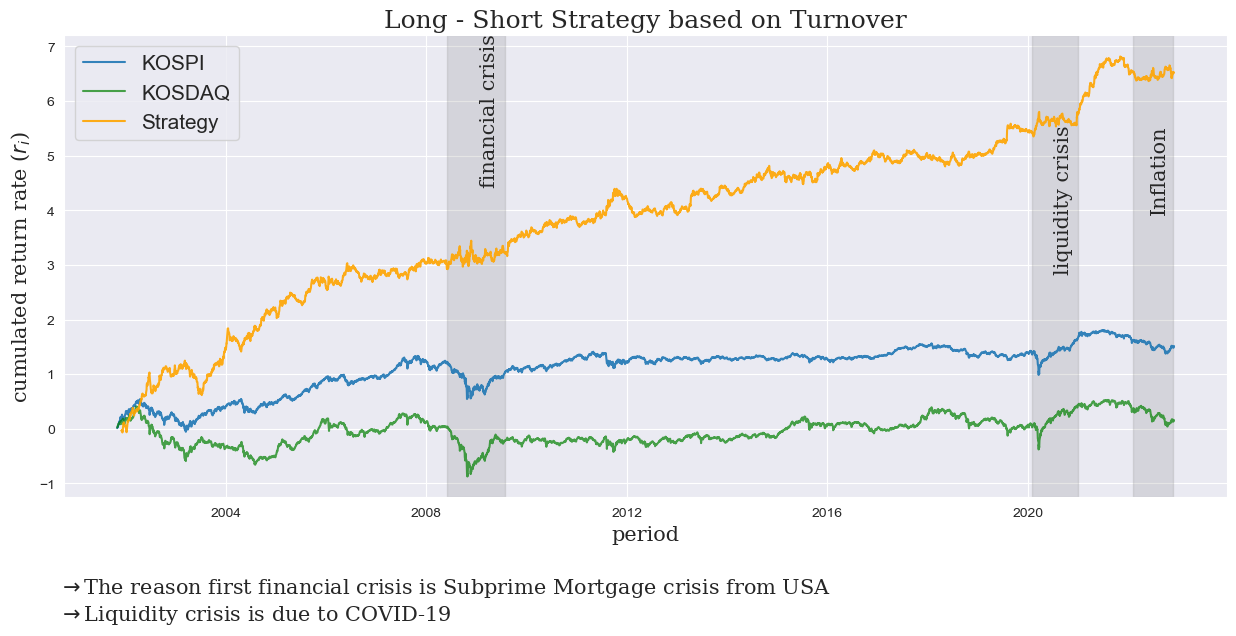

In [61]:
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1)).cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1)).cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot(real_final_cumsum, label = 'Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy based on Turnover', fontsize = 18, fontfamily = 'Serif')
plt.axvspan('2008-06-01', '2009-07-31', color = 'gray', alpha = 0.2)
plt.axvspan('2020-02-01', '2020-12-31', color = 'gray', alpha = 0.2)
plt.axvspan('2022-02-01', '2022-11-26', color = 'gray', alpha = 0.2)
plt.text(14270, 4.5, 'financial crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(18450, 2.9, 'liquidity crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(19150, 4, 'Inflation', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(11200, -3 , r'$\rightarrow$The reason first financial crisis is Subprime Mortgage crisis from USA', ha = 'left', fontsize = 15, fontfamily = 'Serif')
plt.text(11200, -3.5 , r'$\rightarrow$Liquidity crisis is due to COVID-19', ha = 'left', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [62]:
#sharpe ratio_KOSPI
real_final = final_rank_ticker.mean() - final_rank_ticker_short.mean()
print('Annual sharpe ratio of TSLS Strategy :',((real_final.mean() - 0.0025/252*num)/real_final.std()) * (252 ** 0.5)) # annual sharpe ratio
print('Annual sharpe ratio of KOSPI :', (np.log(kospi / kospi.shift(1)).mean() / np.log(kospi / kospi.shift(1)).std()) * (252**0.5))
print('Annual sharpe ratio of KOSDAQ :', (np.log(kosdaq / kosdaq.shift(1)).mean() / np.log(kosdaq / kosdaq.shift(1)).std()) * (252**0.5))

Annual sharpe ratio of TSLS Strategy : 0.9282325906388813
Annual sharpe ratio of KOSPI : 0.34736915759787046
Annual sharpe ratio of KOSDAQ : 0.030630617930019095


In [63]:
#CAGR
print('Annual CAGR of TSLS Strategy :', real_final.sum()/21 - 0.0025*num)
print('Annual CAGR of KOSPI :',np.log(kospi / kospi.shift(1)).sum()/21)
print('Annual CAGR of KOSDAQ :',np.log(kosdaq / kosdaq.shift(1)).sum()/21)

Annual CAGR of TSLS Strategy : 0.3101434311005776
Annual CAGR of KOSPI : 0.07208964393061305
Annual CAGR of KOSDAQ : 0.007326803268067218


In [64]:
#일별 수익률의 평균
real_final.mean()

0.0013430535954341014

In [65]:
#수수료 고려안한 전략 CAGR
real_final.sum()/21

0.3317981930053395

In [66]:
#MDD
def drawdown(returns):
    cumulative = np.exp(returns).cumprod()
    highwatermark = cumulative.cummax()
    drawdown = (cumulative / highwatermark) - 1
    return drawdown

def maximum_drawdown(returns):
    return np.min(drawdown(returns))


In [67]:
print('MDD of TSLS Strategy :', maximum_drawdown(real_final))
print('MDD of KOSPI Strategy :', maximum_drawdown(np.log(kospi / kospi.shift(1))))
print('MDD of KOSDAQ Strategy :', maximum_drawdown(np.log(kosdaq / kosdaq.shift(1))))

MDD of TSLS Strategy : -0.46357996148887837
MDD of KOSPI Strategy : -0.5453664915127014
MDD of KOSDAQ Strategy : -0.7230222693531294


### 각 구간 별 샤프 CAGR
#### period 1 : 2001-12 ~ 2008-11

In [68]:
# 구간별 설정
st = '2001-12-01'
end = '2008-11-30'
n = 7

In [69]:
#샤프 
print('Sharpe ratio of TSLS Strategy :',((real_final[st:end].mean() - 0.0025/252*num*n/21)/real_final[st:end].std()) * (252 ** 0.5))
print('Sharpe ratio of KOSPI :', (np.log(kospi / kospi.shift(1))[st:end].mean() / np.log(kospi / kospi.shift(1))[st:end].std()) * (252**0.5))
print('Sharpe ratio of KOSDAQ :', (np.log(kosdaq / kosdaq.shift(1))[st:end].mean() / np.log(kosdaq / kosdaq.shift(1))[st:end].std()) * (252**0.5))


Sharpe ratio of TSLS Strategy : 1.2458562209649344
Sharpe ratio of KOSPI : 0.2821108726464326
Sharpe ratio of KOSDAQ : -0.4268523898362079


In [70]:
#CAGR
print('CAGR of TSLS Strategy :', real_final[st:end].sum()/n - 0.0025*num*n/21)
print('CAGR of KOSPI :', np.log(kospi / kospi.shift(1))[st:end].sum()/n)
print('CAGR of KOSDAQ :', np.log(kosdaq / kosdaq.shift(1))[st:end].sum()/n)


CAGR of TSLS Strategy : 0.4767076217083062
CAGR of KOSPI : 0.07336327004372742
CAGR of KOSDAQ : -0.11858162943468399


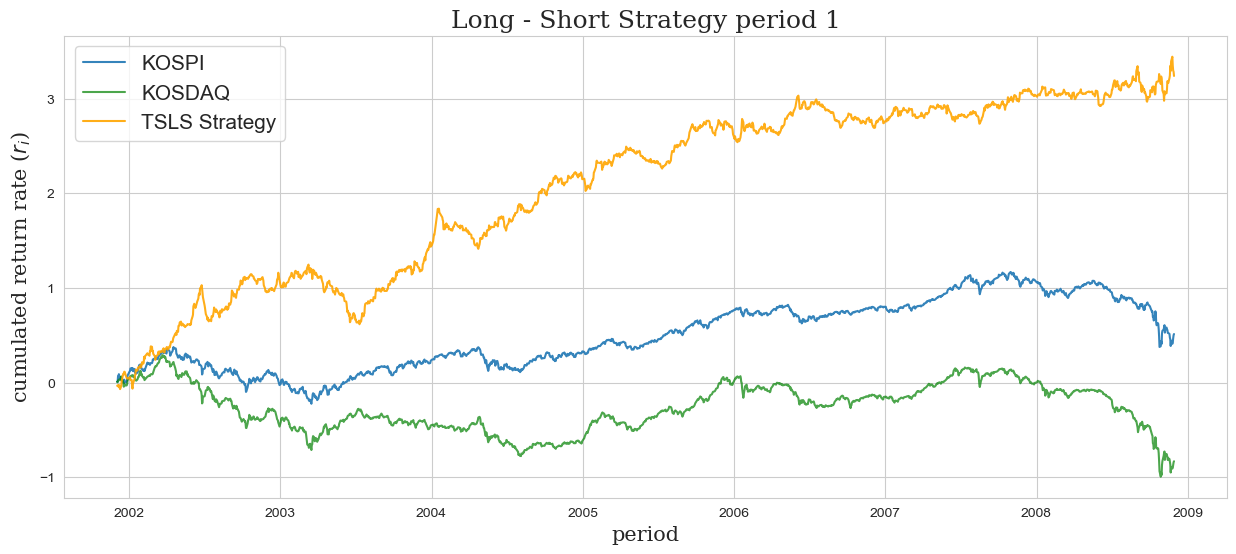

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1))[st:end].cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1))[st:end].cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot((real_final[st:end] - 0.0025/252*num).cumsum(), label = 'TSLS Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy period 1', fontsize = 18, fontfamily = 'Serif')
plt.show()

In [72]:
print('MDD of TSLS Strategy :', maximum_drawdown(real_final[st:end]))
print('MDD of KOSPI Strategy :', maximum_drawdown(np.log(kospi / kospi.shift(1))[st:end]))
print('MDD of KOSDAQ Strategy :', maximum_drawdown(np.log(kosdaq / kosdaq.shift(1))[st:end]))

MDD of TSLS Strategy : -0.46357996148887837
MDD of KOSPI Strategy : -0.5453664915127008
MDD of KOSDAQ Strategy : -0.7230222693531285


#### period 2 : 2008-12 ~ 2019-11

In [73]:
# 구간별 설정
st = '2008-12-01'
end = '2019-11-30'
n = 11

In [74]:
#샤프 
print('Sharpe ratio of TSLS Strategy :',((real_final[st:end].mean() - 0.0025/252*num*n/21)/real_final[st:end].std()) * (252 ** 0.5))
print('Sharpe ratio of KOSPI :', (np.log(kospi / kospi.shift(1))[st:end].mean() / np.log(kospi / kospi.shift(1))[st:end].std()) * (252**0.5))
print('Sharpe ratio of KOSDAQ :', (np.log(kosdaq / kosdaq.shift(1))[st:end].mean() / np.log(kosdaq / kosdaq.shift(1))[st:end].std()) * (252**0.5))


Sharpe ratio of TSLS Strategy : 0.7212249843605629
Sharpe ratio of KOSPI : 0.3760466647361658
Sharpe ratio of KOSDAQ : 0.3309882766721866


In [75]:
#CAGR
print('CAGR of TSLS Strategy :', real_final[st:end].sum()/n - 0.0025*num*n/21)
print('CAGR of KOSPI :', np.log(kospi / kospi.shift(1))[st:end].sum()/n)
print('CAGR of KOSDAQ :', np.log(kosdaq / kosdaq.shift(1))[st:end].sum()/n)


CAGR of TSLS Strategy : 0.21269923994515724
CAGR of KOSPI : 0.0602610906693754
CAGR of KOSDAQ : 0.06564041634092249


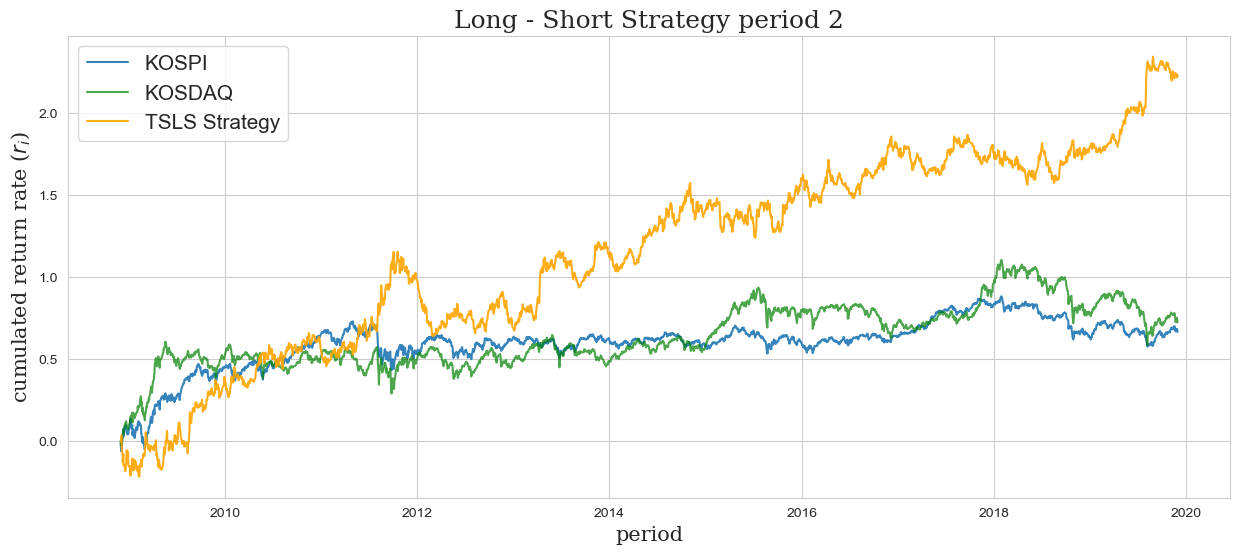

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1))[st:end].cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1))[st:end].cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot((real_final[st:end] - 0.0025/252*num).cumsum(), label = 'TSLS Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy period 2', fontsize = 18, fontfamily = 'Serif')
plt.show()

In [77]:
print('MDD of TSLS Strategy :', maximum_drawdown(real_final[st:end]))
print('MDD of KOSPI Strategy :', maximum_drawdown(np.log(kospi / kospi.shift(1))[st:end]))
print('MDD of KOSDAQ Strategy :', maximum_drawdown(np.log(kosdaq / kosdaq.shift(1))[st:end]))

MDD of TSLS Strategy : -0.3981593291354917
MDD of KOSPI Strategy : -0.2649844699579329
MDD of KOSDAQ Strategy : -0.4051022059220113


#### period 3 : 2019-12 ~ 2022-11

In [78]:
# 구간별 설정
st = '2019-12-01'
end = '2022-11-30'
n = 3

In [79]:
#샤프 
print('Sharpe ratio of TSLS Strategy :',((real_final[st:end].mean() - 0.0025/252*num*n/21)/real_final[st:end].std()) * (252 ** 0.5))
print('Sharpe ratio of KOSPI :', (np.log(kospi / kospi.shift(1))[st:end].mean() / np.log(kospi / kospi.shift(1))[st:end].std()) * (252**0.5))
print('Sharpe ratio of KOSDAQ :', (np.log(kosdaq / kosdaq.shift(1))[st:end].mean() / np.log(kosdaq / kosdaq.shift(1))[st:end].std()) * (252**0.5))


Sharpe ratio of TSLS Strategy : 1.0561387965666533
Sharpe ratio of KOSPI : 0.2657517628691284
Sharpe ratio of KOSDAQ : 0.17632988238740804


In [80]:
#CAGR
print('CAGR of TSLS Strategy :', real_final[st:end].sum()/n - 0.0025*num*n/21)
print('CAGR of KOSPI :', np.log(kospi / kospi.shift(1))[st:end].sum()/n)
print('CAGR of KOSDAQ :', np.log(kosdaq / kosdaq.shift(1))[st:end].sum()/n)


CAGR of TSLS Strategy : 0.36884533199920655
CAGR of KOSPI : 0.05635146838683356
CAGR of KOSDAQ : 0.04731985810176762


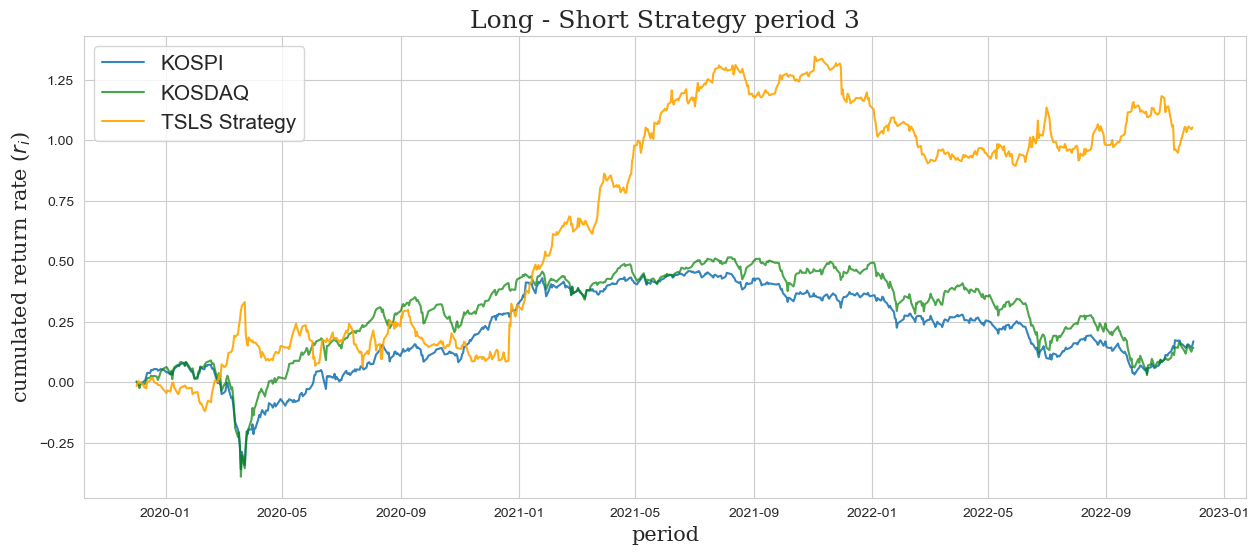

In [81]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1))[st:end].cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1))[st:end].cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot((real_final[st:end] - 0.0025/252*num).cumsum(), label = 'TSLS Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy period 3', fontsize = 18, fontfamily = 'Serif')
plt.show()

In [82]:
print('MDD of TSLS Strategy :', maximum_drawdown(real_final[st:end]))
print('MDD of KOSPI Strategy :', maximum_drawdown(np.log(kospi / kospi.shift(1))[st:end]))
print('MDD of KOSDAQ Strategy :', maximum_drawdown(np.log(kosdaq / kosdaq.shift(1))[st:end]))

MDD of TSLS Strategy : -0.35522785540122614
MDD of KOSPI Strategy : -0.35708898445253
MDD of KOSDAQ Strategy : -0.38529245283018887


#### period 4 : 2008-01 ~ 2008-12 (financial crisis)

In [83]:
# 구간별 설정
st = '2008-01-01'
end = '2008-12-31'
n = 1

In [84]:
#샤프 
print('Sharpe ratio of TSLS Strategy :',((real_final[st:end].mean() - 0.0025/252*num*n/21)/real_final[st:end].std()) * (252 ** 0.5))
print('Sharpe ratio of KOSPI :', (np.log(kospi / kospi.shift(1))[st:end].mean() / np.log(kospi / kospi.shift(1))[st:end].std()) * (252**0.5))
print('Sharpe ratio of KOSDAQ :', (np.log(kosdaq / kosdaq.shift(1))[st:end].mean() / np.log(kosdaq / kosdaq.shift(1))[st:end].std()) * (252**0.5))


Sharpe ratio of TSLS Strategy : 0.1377307588361552
Sharpe ratio of KOSPI : -1.35798790483543
Sharpe ratio of KOSDAQ : -1.8871949678840132


In [85]:
#CAGR
print('CAGR of TSLS Strategy :', real_final[st:end].sum()/n - 0.0025*num*n/21)
print('CAGR of KOSPI :', np.log(kospi / kospi.shift(1))[st:end].sum()/n)
print('CAGR of KOSDAQ :', np.log(kosdaq / kosdaq.shift(1))[st:end].sum()/n)


CAGR of TSLS Strategy : 0.07150147447226606
CAGR of KOSPI : -0.5230304043240094
CAGR of KOSDAQ : -0.7518194473604659


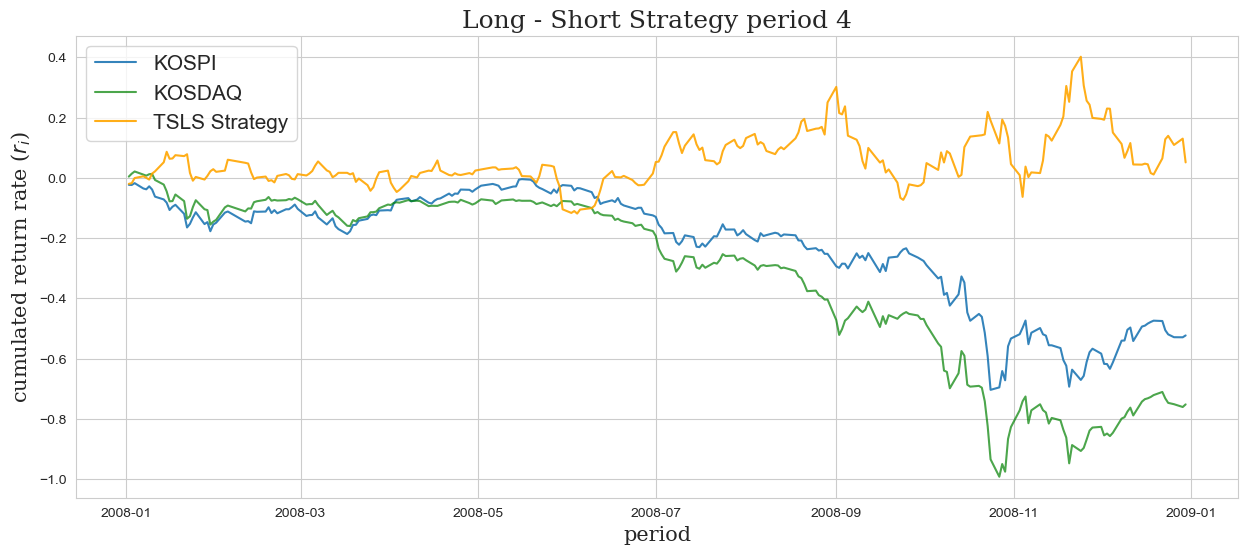

In [86]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1))[st:end].cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1))[st:end].cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot((real_final[st:end] - 0.0025/252*num).cumsum(), label = 'TSLS Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy period 4', fontsize = 18, fontfamily = 'Serif')
plt.show()

In [87]:
print('MDD of TSLS Strategy :', maximum_drawdown(real_final[st:end]))
print('MDD of KOSPI Strategy :', maximum_drawdown(np.log(kospi / kospi.shift(1))[st:end]))
print('MDD of KOSDAQ Strategy :', maximum_drawdown(np.log(kosdaq / kosdaq.shift(1))[st:end]))

MDD of TSLS Strategy : -0.3224418554520663
MDD of KOSPI Strategy : -0.5030123671170219
MDD of KOSDAQ Strategy : -0.6368578380257218


#### period 5 : 2020-01 ~ 2020-06

In [88]:
# 구간별 설정
st = '2020-01-01'
end = '2020-06-30'
n = 0.5

In [89]:
#샤프 
print('Sharpe ratio of TSLS Strategy :',((real_final[st:end].mean() - 0.0025/252*num*n/21)/real_final[st:end].std()) * (252 ** 0.5))
print('Sharpe ratio of KOSPI :', (np.log(kospi / kospi.shift(1))[st:end].mean() / np.log(kospi / kospi.shift(1))[st:end].std()) * (252**0.5))
print('Sharpe ratio of KOSDAQ :', (np.log(kosdaq / kosdaq.shift(1))[st:end].mean() / np.log(kosdaq / kosdaq.shift(1))[st:end].std()) * (252**0.5))


Sharpe ratio of TSLS Strategy : 1.2203924998449243
Sharpe ratio of KOSPI : -0.2352368420683851
Sharpe ratio of KOSDAQ : 0.45363038154847424


In [90]:
#CAGR
print('CAGR of TSLS Strategy :', real_final[st:end].sum()/n - 0.0025*num*n/21)
print('CAGR of KOSPI :', np.log(kospi / kospi.shift(1))[st:end].sum()/n)
print('CAGR of KOSDAQ :', np.log(kosdaq / kosdaq.shift(1))[st:end].sum()/n)


CAGR of TSLS Strategy : 0.4258957352343449
CAGR of KOSPI : -0.08300308661109203
CAGR of KOSDAQ : 0.19375844904246736


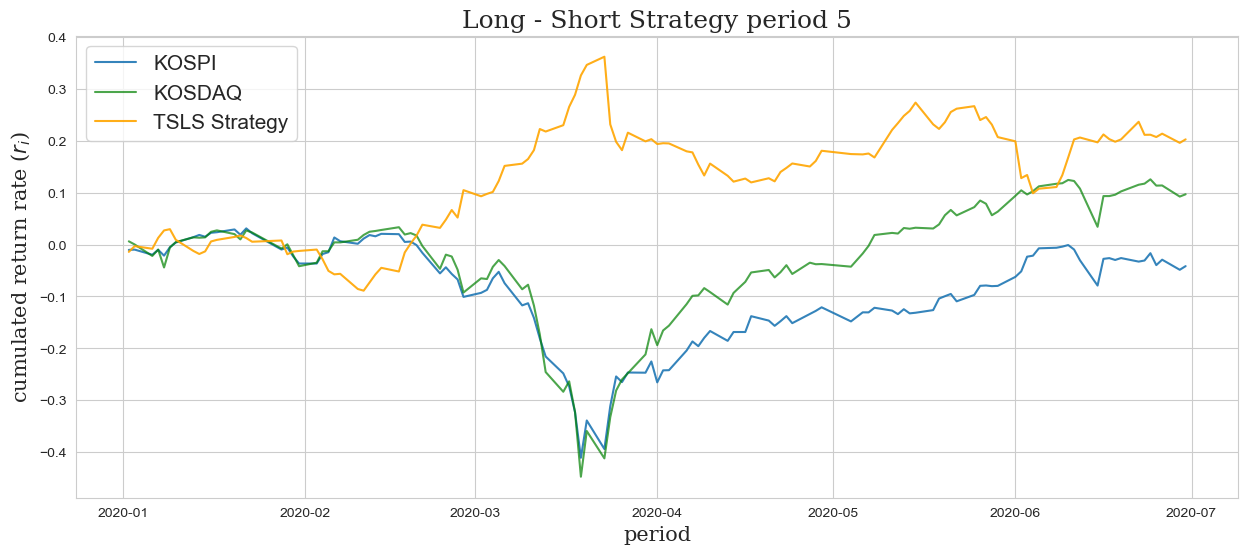

In [91]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1))[st:end].cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1))[st:end].cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot((real_final[st:end] - 0.0025/252*num).cumsum(), label = 'TSLS Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy period 5', fontsize = 18, fontfamily = 'Serif')
plt.show()

In [92]:
print('MDD of TSLS Strategy :', maximum_drawdown(real_final[st:end]))
print('MDD of KOSPI Strategy :', maximum_drawdown(np.log(kospi / kospi.shift(1))[st:end]))
print('MDD of KOSDAQ Strategy :', maximum_drawdown(np.log(kosdaq / kosdaq.shift(1))[st:end]))

MDD of TSLS Strategy : -0.2279508038882463
MDD of KOSPI Strategy : -0.35708898445253
MDD of KOSDAQ Strategy : -0.3815244228186947


- 수익률 지표 : CAGR, SR, simple return,
- 변동성 지표 : MDD , variance,
- 기타 지표 : Turnover

In [93]:
final_rank_ticker.mean()

2001-12-03   -0.020840
2001-12-04    0.043150
2001-12-05    0.007699
2001-12-06    0.028920
2001-12-07   -0.043770
                ...   
2022-11-24    0.012224
2022-11-25   -0.012609
2022-11-28    0.003148
2022-11-29    0.013040
2022-11-30         NaN
Length: 5189, dtype: float64

In [94]:
import time
from dateutil.relativedelta import relativedelta
from pykrx import stock
import datetime

days = list()
start = datetime.datetime(2002,1,1)
for i in range(21): #월말의 날짜를 먼저담고
    days.append(start)
    start = start + relativedelta(years = 1) 
    
for i in range(len(days)): #월말 날짜와 가장 가까운 이전 개장일 정보를 담음
    temp = days[i].strftime("%Y%m%d")
    print(temp, end = " ")
    time.sleep(1)
    temp2 = stock.get_nearest_business_day_in_a_week(temp) 
    days[i] = datetime.datetime.strptime(temp2,"%Y%m%d")

20020101 20030101 20040101 20050101 20060101 20070101 20080101 20090101 20100101 20110101 20120101 20130101 20140101 20150101 20160101 20170101 20180101 20190101 20200101 20210101 20220101 

In [95]:
#TSLS annual
temp = (final_rank_ticker.mean() - final_rank_ticker_short.mean() - 0.0025/252*num).cumsum()
temp = temp.loc[days]
tsls_annual= pd.DataFrame((temp - temp.shift(1)).dropna(), columns = ["Strategy"])

#KOSPI annual
temp = np.log(kospi / kospi.shift(1)).cumsum()
temp = temp.loc[days]
kospi_annual= pd.DataFrame((temp - temp.shift(1)).dropna())
kospi_annual.columns = ["Kospi"]

#KOSDAQ annual
temp = np.log(kosdaq / kosdaq.shift(1)).cumsum()
temp = temp.loc[days]
kosdaq_annual= pd.DataFrame((temp - temp.shift(1)).dropna())
kosdaq_annual.columns = ["Kosdaq"]

temp = pd.concat([tsls_annual,kospi_annual], axis = 1)
annual = pd.concat([temp,kosdaq_annual], axis = 1)

new_ind = list()
for i in annual.index:
    new_ind.append(i.year)
annual.index = new_ind

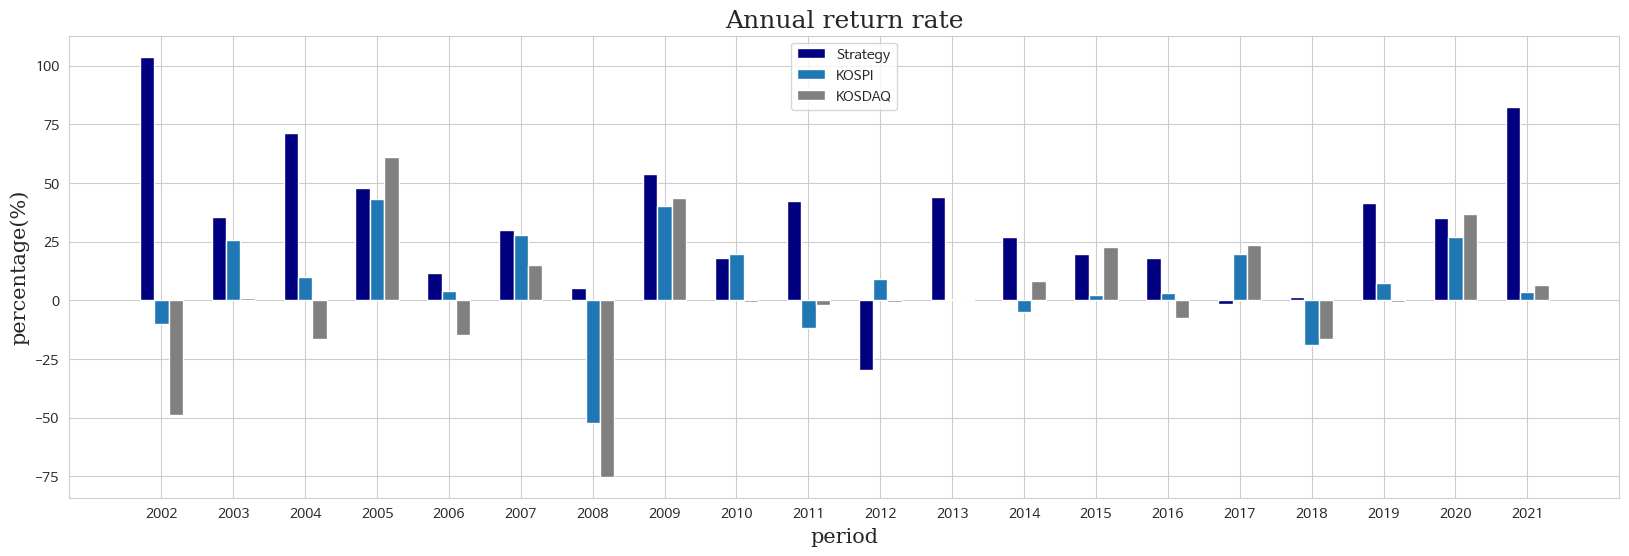

In [96]:
plt.figure(figsize = (20,6))
w = 0.2
annual_ = annual*100
nrow = annual_.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로


plt.bar(idx - w, annual_['Strategy'], width = w, color='navy',label = 'Strategy')
plt.bar(idx, annual_['Kospi'], width = w,label = 'KOSPI')
plt.bar(idx + w, annual_['Kosdaq'], width = w,label = 'KOSDAQ',color='gray')
plt.legend(loc = 'upper center')
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'percentage(%)', fontsize = 15, fontfamily = 'Serif')
plt.title('Annual return rate', fontsize = 18, fontfamily = 'Serif')
plt.xticks(np.arange(20),list(annual_.index))

plt.show()


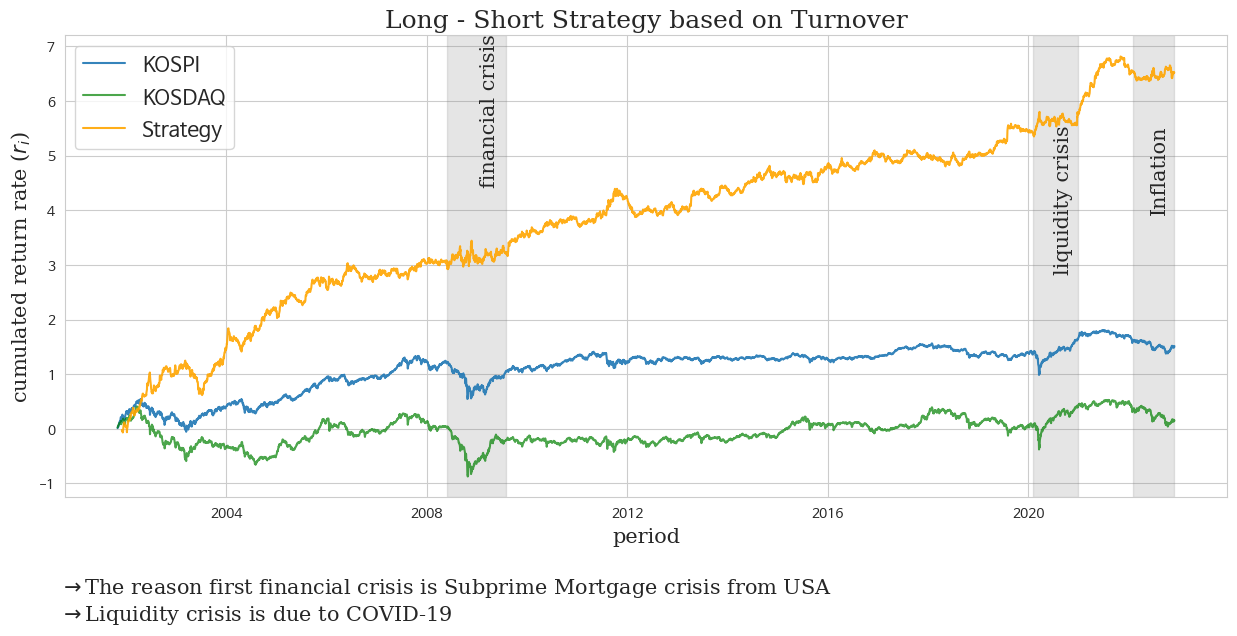

In [97]:
plt.figure(figsize = (15,6))
plt.plot(np.log(kospi / kospi.shift(1)).cumsum(), label = 'KOSPI', alpha = 0.9)
plt.plot(np.log(kosdaq / kosdaq.shift(1)).cumsum(), label = 'KOSDAQ', color = 'green', alpha = 0.7)
plt.plot(real_final_cumsum, label = 'Strategy', color = 'orange', alpha = 0.9)
plt.legend(loc = 'upper left', prop = {'size' : 15})
plt.xlabel('period', fontsize = 15, fontfamily = 'Serif')
plt.ylabel(r'cumulated return rate ($r_i$)', fontsize = 15, fontfamily = 'Serif')
plt.title('Long - Short Strategy based on Turnover', fontsize = 18, fontfamily = 'Serif')
plt.axvspan('2008-06-01', '2009-07-31', color = 'gray', alpha = 0.2)
plt.axvspan('2020-02-01', '2020-12-31', color = 'gray', alpha = 0.2)
plt.axvspan('2022-02-01', '2022-11-26', color = 'gray', alpha = 0.2)
plt.text(14270, 4.5, 'financial crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(18450, 2.9, 'liquidity crisis', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(19150, 4, 'Inflation', ha = 'left', fontsize = 15, fontfamily = 'Serif', rotation = 90)
plt.text(11200, -3 , r'$\rightarrow$The reason first financial crisis is Subprime Mortgage crisis from USA', ha = 'left', fontsize = 15, fontfamily = 'Serif')
plt.text(11200, -3.5 , r'$\rightarrow$Liquidity crisis is due to COVID-19', ha = 'left', fontsize = 15, fontfamily = 'Serif')
plt.show()

In [98]:
real_final_cumsum

2001-12-03   -0.032688
2001-12-04   -0.028604
2001-12-05   -0.036116
2001-12-06   -0.042239
2001-12-07   -0.023347
                ...   
2022-11-24    6.517322
2022-11-25    6.525870
2022-11-28    6.514328
2022-11-29    6.521949
2022-11-30         NaN
Length: 5189, dtype: float64